In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/MyDrive/Classroom/Data Science/pakistan-media-dataset-synthetic.csv")
df

ID         Journalist       Channel    Newspaper     Region  \
0          0        Najam Sethi      ARY News     The News  Islamabad   
1          1  Dr. Shahid Masood      HUM News         Dawn      Sindh   
2          2      Kamran Shahid         Samaa         Jang      Sindh   
3          3      Matiullah Jan      DawnNews  Nawa-i-Waqt  Islamabad   
4          4       RAUF KLASSRA      SAMAA TV     The News      Sindh   
...      ...                ...           ...          ...        ...   
14995  14995        Saleem Safi  AbbTakk News     The News        KPK   
14996  14996        Saleem Safi      HUM News     The News     Punjab   
14997  14997   Shahzeb Khanzada       ARYNEWS         Jang  Islamabad   
14998  14998        Saleem Safi      DawnNews  Nawa-i-Waqt      Sindh   
14999  14999   Mohsin Raza Khan           Geo  Nawa-i-Waqt        KPK   

             City     Topic  \
0          Multan    Sports   
1          Quetta     Crime   
2      Rawalpindi    Health   
3          Multan    Health   
4         Karachi    Sports   
...           ...       ...   
14995     Karachi     Media   
14996      Quetta  Politics   
14997    Peshawar   Economy   
14998      Multan  Politics   
14999     Karachi    Sports   

                                                Headline    Ratings  \
0                            Polio cases reported in KPK  10.613151   
1                     Budget deficit reaches record high  27.545705   
2                    Attack on Army convoy in Waziristan  50.387473   
3                      Hospitals face medicine shortages        NaN   
4      Chief Justice orders suo moto on Karachi violence        NaN   
...                                                  ...        ...   
14995                    Ban on talkshows sparks outrage  93.527230   
14996                  Flood relief funds under scrutiny        NaN   
14997                     Khan addresses rally in Multan        NaN   
14998                  Aid for Balochistan still missing  23.414386   
14999                        Lawyers boycott proceedings        NaN   

         Revenue  ...  BiasScore    Viewership    Shares      AdSpend  \
0       11648570  ...        NaN  1.756573e+06  136184.0  4452987.876   
1      5 million  ...        5.0  1.546170e+06       NaN      1 crore   
2       14072656  ...        NaN           NaN       NaN      50 lakh   
3         812673  ...        2.0  1.083972e+06   16712.0      1 crore   
4            NaN  ...        NaN  7.006350e+05       NaN  3975468.534   
...          ...  ...        ...           ...       ...          ...   
14995        NaN  ...        NaN  3.635476e+00       NaN      50 lakh   
14996    9191778  ...        0.0  3.935510e+05       NaN      50 lakh   
14997  5 million  ...        4.0  1.472680e+06       NaN  3355467.497   
14998        NaN  ...        3.0           NaN   65194.0      1 crore   
14999    10 lakh  ...        NaN  3.452320e+05       NaN          NaN   

       ControversyFlag MissingDataFlag        Date  Language  \
0                   No             1.0  2021-06-21   English   
1                    1             NaN  2019-11-19      urdu   
2                  Yes             NaN  2024-05-07      urdu   
3                    1             NaN  2019-10-03      urdu   
4                  NaN             0.0  2018-02-07      Urdu   
...                ...             ...         ...       ...   
14995              Yes             0.0  2019-04-24       ENG   
14996              NaN             NaN  2024-12-20   English   
14997               No             0.0  2018-11-01      urdu   
14998              Yes             0.0  2023-08-01      urdu   
14999                1             1.0  2025-05-03   English   

      PoliticalAffiliation SocialMediaInteractions  
0               Opposition                     NaN  
1                      NaN                 14461.0  
2                 Pro-Govt                 33436.0  
3                  Neutral                     Na

# Phase 1:Data Cleaning and Preprocessing

## 1.Standardize Categorical Values

Columns: Journalist, Channel, Newspaper, Region, City, Topic, Language, PoliticalAffiliation, ControversyFlag

Action: Remove duplicates, correct inconsistent spellings, and standardize formats.

In [5]:
#standardize channel column
df["Channel"] = df["Channel"].str.lower().str.title()

#standardize Journalist column
df["Journalist"] = df["Journalist"].str.lower().str.title()

#standardize Newspaper column
df["Newspaper"] = df["Newspaper"].str.lower().str.title()

#standardize Region	column
df["Region"] = df["Region"].str.lower().str.title()

#standardize City	column
df["City"] = df["City"].str.lower().str.title()

#standardize Topic	column
df["Topic"] = df["Topic"].str.lower().str.title()

#standardize Language	column
df["Language"] = df["Language"].str.lower().str.title()

#standardize PoliticalAffiliation	column
df["PoliticalAffiliation"] = df["PoliticalAffiliation"].str.lower().str.title()

display(df.head())

ID         Journalist   Channel    Newspaper     Region        City  \
0   0        Najam Sethi  Ary News     The News  Islamabad      Multan   
1   1  Dr. Shahid Masood  Hum News         Dawn      Sindh      Quetta   
2   2      Kamran Shahid     Samaa         Jang      Sindh  Rawalpindi   
3   3      Matiullah Jan  Dawnnews  Nawa-I-Waqt  Islamabad      Multan   
4   4       Rauf Klassra  Samaa Tv     The News      Sindh     Karachi   

    Topic                                           Headline    Ratings  \
0  Sports                        Polio cases reported in KPK  10.613151   
1   Crime                 Budget deficit reaches record high  27.545705   
2  Health                Attack on Army convoy in Waziristan  50.387473   
3  Health                  Hospitals face medicine shortages        NaN   
4  Sports  Chief Justice orders suo moto on Karachi violence        NaN   

     Revenue  ...  BiasScore  Viewership    Shares      AdSpend  \
0   11648570  ...        NaN   1756573.0  136184.0  4452987.876   
1  5 million  ...        5.0   1546170.0       NaN      1 crore   
2   14072656  ...        NaN         NaN       NaN      50 lakh   
3     812673  ...        2.0   1083972.0   16712.0      1 crore   
4        NaN  ...        NaN    700635.0       NaN  3975468.534   

   ControversyFlag MissingDataFlag        Date  Language PoliticalAffiliation  \
0               No             1.0  2021-06-21   English           Opposition   
1                1             NaN  2019-11-19      Urdu                  NaN   
2              Yes             NaN  2024-05-07      Urdu             Pro-Govt   
3                1             NaN  2019-10-03      Urdu              Neutral   
4              NaN             0.0  2018-02-07      Urdu              Neutral   

  SocialMediaInteractions  
0                     NaN  
1                 14461.0  
2                 33436.0  
3                     NaN  
4                     NaN  

[5 rows x 22 columns]

## 2.Convert Monetary Values to Numerical (PKR)


In [6]:
# If the column primarily contains numerical data, 'None' will be converted to NaN.
# None can be preserved as None if the column explicitly contains a mix of None and other Python objects (like strings or lists).

def convertMonetary(value):
    if pd.isna(value):
        return None # Python will convert this to NaN

    # Convert the value to string and split it into parts
    parts = str(value).split()

    # If there are two parts (e.g., '1 Lakh'), extract the number and unit
    if len(parts) == 2:
        number = float(parts[0].replace(',', ''))
        unit = parts[1].lower()

        # Convert to PKR based on the unit
        if unit == 'lakh':
            return number * 100000
        elif unit == 'million':
            return number * 1000000
        elif unit == 'crore':
            return number * 10000000
        else:
            return number
    else:
        # If there's no unit, return the number as-is
        return float(value.replace(',', ''))

# calling this function for both columns:
df['Revenue'] = df['Revenue'].apply(convertMonetary)
df['AdSpend'] = df['AdSpend'].apply(convertMonetary)
print(df['Revenue'].dtype)
display(df.head())

float64


ID         Journalist   Channel    Newspaper     Region        City  \
0   0        Najam Sethi  Ary News     The News  Islamabad      Multan   
1   1  Dr. Shahid Masood  Hum News         Dawn      Sindh      Quetta   
2   2      Kamran Shahid     Samaa         Jang      Sindh  Rawalpindi   
3   3      Matiullah Jan  Dawnnews  Nawa-I-Waqt  Islamabad      Multan   
4   4       Rauf Klassra  Samaa Tv     The News      Sindh     Karachi   

    Topic                                           Headline    Ratings  \
0  Sports                        Polio cases reported in KPK  10.613151   
1   Crime                 Budget deficit reaches record high  27.545705   
2  Health                Attack on Army convoy in Waziristan  50.387473   
3  Health                  Hospitals face medicine shortages        NaN   
4  Sports  Chief Justice orders suo moto on Karachi violence        NaN   

      Revenue  ...  BiasScore  Viewership    Shares       AdSpend  \
0  11648570.0  ...        NaN   1756573.0  136184.0  4.452988e+06   
1   5000000.0  ...        5.0   1546170.0       NaN  1.000000e+07   
2  14072656.0  ...        NaN         NaN       NaN  5.000000e+06   
3    812673.0  ...        2.0   1083972.0   16712.0  1.000000e+07   
4         NaN  ...        NaN    700635.0       NaN  3.975469e+06   

   ControversyFlag  MissingDataFlag        Date  Language  \
0               No              1.0  2021-06-21   English   
1                1              NaN  2019-11-19      Urdu   
2              Yes              NaN  2024-05-07      Urdu   
3                1              NaN  2019-10-03      Urdu   
4              NaN              0.0  2018-02-07      Urdu   

  PoliticalAffiliation SocialMediaInteractions  
0           Opposition                     NaN  
1                  NaN                 14461.0  
2             Pro-Govt                 33436.0  
3              Neutral                     NaN  
4              Neutral                     NaN  

[5 rows x 22 columns]

## 3.Handle Missing Values

Columns: Ratings, Airtime, SentimentScore, BiasScore, Viewership, Shares, Language, PoliticalAffiliation, SocialMediaInteractions
Action: Impute missing values or flag them as appropriate.

In [7]:
print(df['Ratings'].median())
print(df['Revenue'].median())
print(df['AdSpend'].median())
print(df['Airtime'].median())
print(df['SentimentScore'].median())
print(df['BiasScore'].median())
print(df['Viewership'].median())
print(df['Shares'].median())
print(df['SocialMediaInteractions'].median())
print("--------------------------------------")
print(df.isna().sum())

57.071672680000006
5000000.0
5000000.0
234.0
0.008126175683499999
2.0
49.95785187
100495.0
25059.0
--------------------------------------
ID                            0
Journalist                    0
Channel                       0
Newspaper                     0
Region                        0
City                          0
Topic                         0
Headline                      0
Ratings                    7360
Revenue                    3081
Airtime                    7511
SentimentScore             7510
BiasScore                  7555
Viewership                 5004
Shares                     7496
AdSpend                    3705
ControversyFlag            2933
MissingDataFlag            4978
Date                          0
Language                   2993
PoliticalAffiliation       3743
SocialMediaInteractions    7560
dtype: int64


In [8]:
df['Ratings'] = df['Ratings'].fillna(df['Ratings'].median())
df['Revenue'] = df['Revenue'].fillna(df['Revenue'].median())
df['AdSpend'] = df['AdSpend'].fillna(df['AdSpend'].median())
df['Airtime'] = df['Airtime'].fillna(df['Airtime'].median())
df['SentimentScore']= df['SentimentScore'].fillna(df['SentimentScore'].median())
df['BiasScore']= df['BiasScore'].fillna(df['BiasScore'].median())
df['Viewership']= df['Viewership'].fillna(df['Viewership'].median())
df['Shares']= df['Shares'].fillna(df['Shares'].median())
df['SocialMediaInteractions']=df['SocialMediaInteractions'].fillna(df['SocialMediaInteractions'].median())


print(df["Channel"].unique())
df.loc[:,"Channel"] = df.loc[:,"Channel"].replace({"Arynews": "Ary News","Ary": "Ary News","Samaa Tv":"Samaa TV","Samaa" : "Samaa TV","Geo":"Geo News","Abbtak News":"AbbTak News","Express":"Express News","Express-News":"Express News","Dawnnews":"Dawn News","Dawn":"Dawn News"})
print(df["Channel"].unique())

print(df["Language"].unique())
df.loc[:,"Language"] = df.loc[:,"Language"].replace({"Eng":"English"})
df.loc[:,"Language"] = df.loc[:,"Language"].fillna("Urdu")
print(df["Language"].unique())

print(df["PoliticalAffiliation"].unique())
df["PoliticalAffiliation"] = df["PoliticalAffiliation"].fillna("Neutral")
print(df["PoliticalAffiliation"].unique())

print(df["ControversyFlag"].unique())
df["ControversyFlag"] = df["ControversyFlag"].replace({"1":"Yes","0":"No"})
df["ControversyFlag"] = df["ControversyFlag"].fillna("Yes")


cleanData = df.copy()
df

['Ary News' 'Hum News' 'Samaa' 'Dawnnews' 'Samaa Tv' 'Geo' 'Abbtakk News'
 'Express-News' 'Geo News' 'Arynews' 'Ary' 'Dawn' 'Express']
['Ary News' 'Hum News' 'Samaa TV' 'Dawn News' 'Geo News' 'Abbtakk News'
 'Express News']
['English' 'Urdu' 'Eng' nan]
['English' 'Urdu']
['Opposition' nan 'Pro-Govt' 'Neutral']
['Opposition' 'Neutral' 'Pro-Govt']
['No' '1' 'Yes' nan '0']


ID         Journalist       Channel    Newspaper     Region  \
0          0        Najam Sethi      Ary News     The News  Islamabad   
1          1  Dr. Shahid Masood      Hum News         Dawn      Sindh   
2          2      Kamran Shahid      Samaa TV         Jang      Sindh   
3          3      Matiullah Jan     Dawn News  Nawa-I-Waqt  Islamabad   
4          4       Rauf Klassra      Samaa TV     The News      Sindh   
...      ...                ...           ...          ...        ...   
14995  14995        Saleem Safi  Abbtakk News     The News        Kpk   
14996  14996        Saleem Safi      Hum News     The News     Punjab   
14997  14997   Shahzeb Khanzada      Ary News         Jang  Islamabad   
14998  14998        Saleem Safi     Dawn News  Nawa-I-Waqt      Sindh   
14999  14999   Mohsin Raza Khan      Geo News  Nawa-I-Waqt        Kpk   

             City     Topic  \
0          Multan    Sports   
1          Quetta     Crime   
2      Rawalpindi    Health   
3          Multan    Health   
4         Karachi    Sports   
...           ...       ...   
14995     Karachi     Media   
14996      Quetta  Politics   
14997    Peshawar   Economy   
14998      Multan  Politics   
14999     Karachi    Sports   

                                                Headline    Ratings  \
0                            Polio cases reported in KPK  10.613151   
1                     Budget deficit reaches record high  27.545705   
2                    Attack on Army convoy in Waziristan  50.387473   
3                      Hospitals face medicine shortages  57.071673   
4      Chief Justice orders suo moto on Karachi violence  57.071673   
...                                                  ...        ...   
14995                    Ban on talkshows sparks outrage  93.527230   
14996                  Flood relief funds under scrutiny  57.071673   
14997                     Khan addresses rally in Multan  57.071673   
14998                  Aid for Balochistan still missing  23.414386   
14999                        Lawyers boycott proceedings  57.071673   

          Revenue  ...  BiasScore    Viewership    Shares       AdSpend  \
0      11648570.0  ...        2.0  1.756573e+06  136184.0  4.452988e+06   
1       5000000.0  ...        5.0  1.546170e+06  100495.0  1.000000e+07   
2      14072656.0  ...        2.0  4.995785e+01  100495.0  5.000000e+06   
3        812673.0  ...        2.0  1.083972e+06   16712.0  1.000000e+07   
4       5000000.0  ...        2.0  7.006350e+05  100495.0  3.975469e+06   
...           ...  ...        ...           ...       ...           ...   
14995   5000000.0  ...        2.0  3.635476e+00  100495.0  5.000000e+06   
14996   9191778.0  ...        0.0  3.935510e+05  100495.0  5.000000e+06   
14997   5000000.0  ...        4.0  1.472680e+06  100495.0  3.355467e+06   
14998   5000000.0  ...        3.0  4.995785e+01   65194.0  1.000000e+07   
14999   1000000.0  ...        2.0  3.452320e+05  100495.0  5.000000e+06   

       ControversyFlag  MissingDataFlag        Date  Language  \
0                   No              1.0  2021-06-21   English   
1                  Yes              NaN  2019-11-19      Urdu   
2                  Yes              NaN  2024-05-07      Urdu   
3                  Yes              NaN  2019-10-03      Urdu   
4                  Yes              0.0  2018-02-07      Urdu   
...                ...              ...         ...       ...   
14995              Yes              0.0  2019-04-24   English   
14996              Yes              NaN  2024-12-20   English   
14997               No              0.0  2018-11-01      Urdu   
14998              Yes              0.0  2023-08-01      Urdu   
14999              Yes              1.0  2025-05-03   English   

      PoliticalAffiliation SocialMediaInteractions  
0               Opposition                 25059.0  
1                  Neutral                 14461.0  
2                 Pro-Govt                 33436.0  
3            

## 4.Fix  impossible numerical entries
using the clip function

In [9]:
# Correct impossible numerical entries
# The .clip() function limits the values in a pandas Series (a column) to a specified range:
# If a value is below the lower bound, it is set to the lower bound value.
# If a value is above the upper bound, it is set to the upper bound value.
# If a value is within the bounds, it remains unchanged.

df['Airtime'] = df['Airtime'].clip(lower=0)
df['Ratings'] = df['Ratings'].clip(lower=0 ,upper=100)
df['SentimentScore'] = df['SentimentScore'].clip(lower=-1, upper=1)
df['BiasScore'] = df['BiasScore'].clip(lower=0, upper=10)

## 5.Detect and Treat Outliers

In [10]:
def Outliers(column):
  EDA = df[column].describe()
  Q1 = EDA["25%"]
  Q3 = EDA["75%"]
  IQR = Q3-Q1

  lowerBound = Q1 - 1.5*IQR
  upperBound = Q3 + 1.5*IQR
  print(f"column: {column} with upperbound = {upperBound}, lowerbound = {lowerBound} ")
  # applying the lower bound and upper bound to every column
  # df[column] = df[column].clip(lower=lowerBound,upper=upperBound)


# call the function for all Numerical columns
Outliers('Airtime')
Outliers('Ratings')
Outliers('Revenue')
Outliers('AdSpend')
Outliers('SentimentScore')
Outliers('BiasScore')
Outliers('Viewership')
Outliers('SocialMediaInteractions')
Outliers('Shares')

column: Airtime with upperbound = 234.0, lowerbound = 234.0 
column: Ratings with upperbound = 62.1847976025, lowerbound = 52.1791337825 
column: Revenue with upperbound = 31347098.125, lowerbound = -10808258.875 
column: AdSpend with upperbound = 5000000.0, lowerbound = 5000000.0 
column: SentimentScore with upperbound = 0.008126175683499999, lowerbound = 0.008126175683499999 
column: BiasScore with upperbound = 2.0, lowerbound = 2.0 
column: Viewership with upperbound = 1314853.4645717312, lowerbound = -788851.7742862188 
column: SocialMediaInteractions with upperbound = 25059.0, lowerbound = 25059.0 
column: Shares with upperbound = 100732.625, lowerbound = 100269.625 


# Phase 2:Exploratory Data Analysis (EDA)

## 1.Descriptive Statistics



In [11]:
# Descriptive statistics for numerical columns
numerical_columns = [
    'Airtime', 'Ratings', 'Revenue', 'AdSpend',
    'SentimentScore', 'BiasScore', 'Viewership',
    'Shares', 'SocialMediaInteractions'
]

# Display summary statistics
print(df[numerical_columns].describe())

# Count unique values for categorical columns
categorical_columns = [
    'Channel', 'Journalist', 'Newspaper', 'Region',
    'City', 'Topic', 'Language', 'PoliticalAffiliation', 'ControversyFlag'
]

for column in categorical_columns:
    print(f"\n{column}:\n{df[column].value_counts()}")

            Airtime       Ratings       Revenue       AdSpend  SentimentScore  \
count  15000.000000  15000.000000  1.500000e+04  1.500000e+04    15000.000000   
mean     234.265600     56.558552  8.306362e+06  5.604420e+06        0.010564   
std      106.991404     23.964123  7.064171e+06  2.825701e+06        0.573224   
min        0.000000      0.000000 -4.687100e+04 -9.960781e+04       -1.000000   
25%      234.000000     55.931258  5.000000e+06  5.000000e+06        0.008126   
50%      234.000000     57.071673  5.000000e+06  5.000000e+06        0.008126   
75%      234.000000     58.432674  1.553884e+07  5.000000e+06        0.008126   
max      500.000000    100.000000  2.000000e+07  1.000000e+07        1.000000   

          BiasScore    Viewership         Shares  SocialMediaInteractions  
count  15000.000000  1.500000e+04   15000.000000             15000.000000  
mean       2.069667  3.398049e+05  100325.299933             25051.932400  
std        1.281245  5.836532e+05   40674.

## 2.Data Visualization

In [12]:
# Histograms for numerical columns
for column in numerical_columns:
    fig = px.histogram(df, x=column, nbins=10, title=f"Distribution of {column}")
    fig.show()


In [13]:
# Box plots for numerical columns
for column in numerical_columns:
    fig = px.box(df, y=column, title=f"Box Plot of {column}")
    fig.show()


In [14]:
df["ControversyFlag"]

0         No
1        Yes
2        Yes
3        Yes
4        Yes
        ... 
14995    Yes
14996    Yes
14997     No
14998    Yes
14999    Yes
Name: ControversyFlag, Length: 15000, dtype: object

In [15]:
# Bar plots for categorical columns
for column in categorical_columns:
    fig = px.bar(df[column].value_counts().reset_index(),
                 x=column, y='count', title=f"Distribution of {column}")
    fig.show()


## 3.Topic and Sentiment Analysis


In [16]:
## Visualize the frequency of Topics covered by different Channels.

topic_channel_df = df.groupby(['Channel', 'Topic']).size().reset_index(name='Count')
fig = px.bar(topic_channel_df, x='Channel', y='Count', color='Topic',
             title="Topics Covered by Channel", barmode='stack')
fig.show()


In [17]:
###Explore the distribution of SentimentScore by Topic or Channel.
#Compare SentimentScore by Topic
fig = px.box(df, x='Channel', y='SentimentScore', color='Topic',
             title="Sentiment Score by Topic and Channel")
fig.show()


# Phase 3: Bias and Influence Analysis


## 1.Visualize the relationship between BiasScore and Revenue/AdSpend.


**Interpretation:**

*   The scatter plots show the relationship between `BiasScore` and `Revenue`/`AdSpend`, with points colored by `PoliticalAffiliation`. Observe if there are any discernible clusters or trends indicating that higher bias scores are associated with higher or lower revenue/ad spend, and if this relationship varies across political affiliations.

In [18]:
import plotly.express as px

# Scatter plot for BiasScore vs. Revenue
fig = px.scatter(df, x='BiasScore', y='Revenue', color='PoliticalAffiliation',
                  title="Bias Score vs. Revenue by Political Affiliation")
fig.show()

# Scatter plot for BiasScore vs. AdSpend
fig = px.scatter(df, x='BiasScore', y='AdSpend', color='PoliticalAffiliation',
                  title="Bias Score vs. AdSpend by Political Affiliation")
fig.show()

## 2.Analyze the relationship between PoliticalAffiliation and other relevant variables (e.g., Topic, SentimentScore).

**Interpretation:**

*   The bar plot visualizes the distribution of `Topic` across different `PoliticalAffiliation` categories. This helps understand if certain political affiliations tend to cover particular topics more frequently than others.
*   The box plot shows the distribution of `SentimentScore` for each `PoliticalAffiliation`. This can reveal if there's a difference in the general sentiment expressed by media outlets with different political leanings.

In [19]:
# Analyze the relationship between PoliticalAffiliation and Topic
political_topic_df = df.groupby(['PoliticalAffiliation', 'Topic']).size().reset_index(name='Count')
fig = px.bar(political_topic_df, x='PoliticalAffiliation', y='Count', color='Topic',
             title="Topics Covered by Political Affiliation", barmode='stack')
fig.show()

# Analyze the relationship between PoliticalAffiliation and SentimentScore
fig = px.box(df, x='PoliticalAffiliation', y='SentimentScore',
             title="Sentiment Score by Political Affiliation")
fig.show()

## 3.Analyze the influence of Journalists and Channels

**Interpretation:**

*   These box plots display the distribution of `SentimentScore` and `BiasScore` for each `Journalist`. This helps identify if certain journalists consistently exhibit higher or lower sentiment/bias scores.
*   The bar plot shows the distribution of `ControversyFlag` (Yes/No) across different `Channel` categories. This can indicate which channels tend to have more controversial content.

In [20]:
# Analyze the relationship between Journalist and SentimentScore
fig = px.box(df, x='Journalist', y='SentimentScore',
             title="Sentiment Score by Journalist")
fig.show()

# Analyze the relationship between Journalist and BiasScore
fig = px.box(df, x='Journalist', y='BiasScore',
             title="Bias Score by Journalist")
fig.show()

# Analyze the relationship between Channel and ControversyFlag
channel_controversy_df = df.groupby(['Channel', 'ControversyFlag']).size().reset_index(name='Count')
fig = px.bar(channel_controversy_df, x='Channel', y='Count', color='ControversyFlag',
             title="Controversy Flag by Channel", barmode='stack')
fig.show()

## 4.Analyze Correlations between Numerical Variables

**Interpretation:**

*   The heatmap displays the correlation matrix of the numerical variables. The color intensity and the values indicate the strength and direction of the linear relationship between each pair of variables. Look for strong positive or negative correlations (values close to 1 or -1).

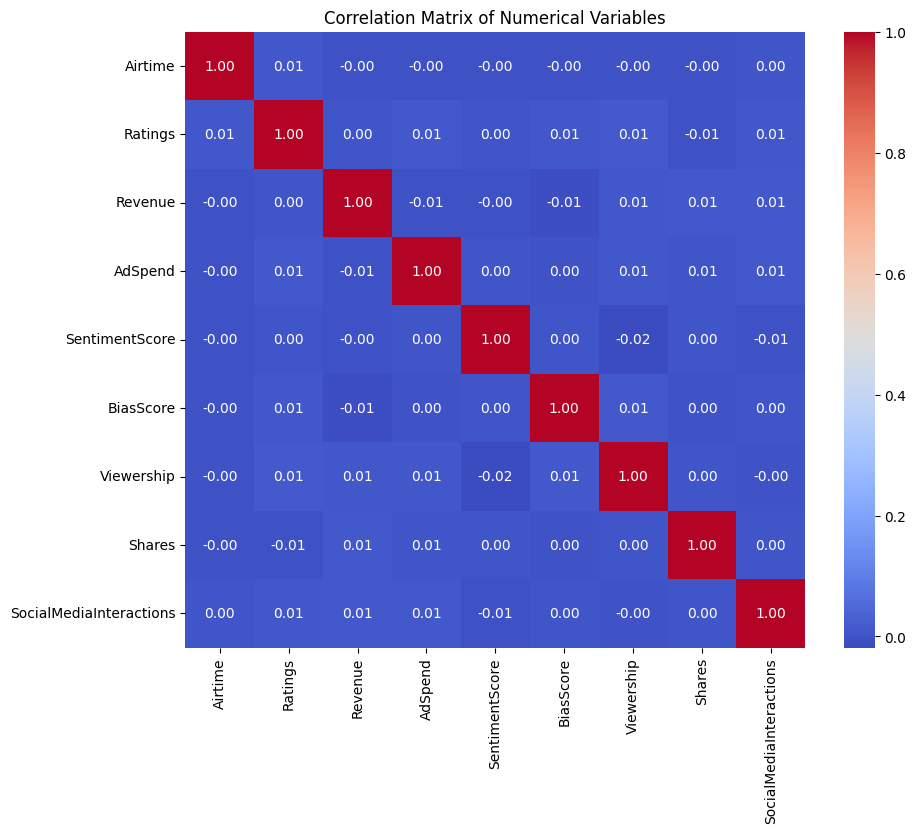

In [21]:
# Select only numerical columns for correlation analysis
numerical_df = df[numerical_columns]

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

## 5.Analyze the influence of Categorical Variables on Key Metrics

**Interpretation:**

*   These box plots visualize the distribution of `Ratings`, `Revenue`, and `SocialMediaInteractions` across different categories of `PoliticalAffiliation`, `Channel`, and `Topic`. This helps identify which political affiliations, channels, or topics are associated with higher or lower engagement and financial metrics.

In [22]:
# Analyze the influence of Political Affiliation on Ratings, Revenue, and SocialMediaInteractions
fig = px.box(df, x='PoliticalAffiliation', y='Ratings', title="Ratings by Political Affiliation")
fig.show()

fig = px.box(df, x='PoliticalAffiliation', y='Revenue', title="Revenue by Political Affiliation")
fig.show()

fig = px.box(df, x='PoliticalAffiliation', y='SocialMediaInteractions', title="Social Media Interactions by Political Affiliation")
fig.show()

# Analyze the influence of Channel on Ratings, Revenue, and SocialMediaInteractions
fig = px.box(df, x='Channel', y='Ratings', title="Ratings by Channel")
fig.show()

fig = px.box(df, x='Channel', y='Revenue', title="Revenue by Channel")
fig.show()

fig = px.box(df, x='Channel', y='SocialMediaInteractions', title="Social Media Interactions by Channel")
fig.show()

# Analyze the influence of Topic on Ratings, Revenue, and SocialMediaInteractions
fig = px.box(df, x='Topic', y='Ratings', title="Ratings by Topic")
fig.show()

fig = px.box(df, x='Topic', y='Revenue', title="Revenue by Topic")
fig.show()

fig = px.box(df, x='Topic', y='SocialMediaInteractions', title="Social Media Interactions by Topic")
fig.show()

# Phase 4: Data Trustworthiness, Limitations, and Reporting

## 1.Assess Data Trustworthiness and Limitations

Based on the data cleaning and exploratory analysis, it's important to critically evaluate the trustworthiness of the dataset and the potential limitations that could affect the validity of our findings.

**Impact of Data Cleaning and Imputation:**

*   The imputation of missing values, particularly for columns like `Ratings`, `Airtime`, `SentimentScore`, `BiasScore`, `Viewership`, `Shares`, and `SocialMediaInteractions` using the median, could potentially skew the distributions of these variables and mask underlying patterns. While imputation is necessary to handle missing data, using the median can introduce a central tendency that may not accurately reflect the true variability or distribution if a large percentage of data was missing.
*   The outlier treatment using the `.clip()` function, while intended to handle extreme values, might have also compressed the range of some variables, potentially reducing the observed variability and impact of outliers on relationships with other variables. This is particularly relevant for columns where a significant number of values were clipped.

**Limitations of Provided Metrics and Flags:**

*   **Ratings:** The source and methodology for calculating the `Ratings` are not provided. Without this information, it's difficult to assess the reliability and comparability of these ratings across different channels or topics. Are these raw viewership numbers, survey-based ratings, or a composite score?
*   **SentimentScore:** The method used to derive the `SentimentScore` is also not specified. Different sentiment analysis techniques can yield varying results, and the score's accuracy depends on the model and lexicon used. The constant `SentimentScore` for a large portion of the data after imputation raises questions about its granularity and usefulness for nuanced analysis.
*   **BiasScore:** Similar to `SentimentScore`, the methodology for calculating `BiasScore` is unclear. What criteria were used to determine bias, and how was the scoring system developed? The prevalence of a constant `BiasScore` after imputation and clipping also limits its effectiveness in revealing subtle biases.
*   **ControversyFlag:** The `ControversyFlag` is a binary indicator (Yes/No) and the criteria for flagging content as controversial are not defined. This subjective flagging process could be inconsistent or influenced by the data collectors' own biases. The high proportion of "Yes" flags after imputation might not accurately reflect the true level of controversy.
*   **MissingDataFlag:** The purpose and meaning of the `MissingDataFlag` are not explicitly stated. It seems to indicate the presence of missing data, but it's unclear if it refers to missing values in specific columns or the record as a whole. Understanding which data points this flag refers to is crucial for interpreting its significance.

**Overall Data Integrity Concerns:**

*   The presence of numerous missing values across several key columns raises concerns about the completeness of the dataset.
*   The consistency issues identified during the standardization of categorical variables (though addressed in cleaning) suggest potential inconsistencies in the original data collection process.
*   The potential for human or algorithmic manipulation in the original data collection or processing stages cannot be ruled out without more information on the data provenance and collection methodology.

These limitations suggest that while we can identify potential patterns and relationships in the data, the conclusions drawn should be interpreted with caution and acknowledged as being subject to the inherent uncertainties and potential biases within the dataset itself.

## 2.Summary of Findings on Bias and Influence

Based on the exploratory data analysis and the visualizations in Phase 3, we can summarize potential findings related to bias and influence within this dataset. It's important to reiterate the limitations discussed earlier regarding data trustworthiness and the methodology behind the metrics and flags.

**Key Observations:**

*   **Political Affiliation and Topic Coverage:** The bar plot showing "Topics Covered by Political Affiliation" may indicate if certain political affiliations tend to prioritize specific topics. For example, we might observe that "Opposition" media focus more on "Politics" or "Crime," while "Pro-Govt" media might cover "Economy" or "Development" more frequently. "Neutral" media might show a more balanced distribution across topics.
*   **Political Affiliation and Sentiment:** The box plot of "Sentiment Score by Political Affiliation" can reveal if there are differences in the general sentiment expressed by media outlets with different political leanings. We might see that "Opposition" media tend to have a lower (more negative) median sentiment score compared to "Pro-Govt" or "Neutral" media.
*   **Bias Score and Financial Metrics:** The scatter plots of "Bias Score vs. Revenue" and "Bias Score vs. AdSpend" provide a visual exploration of the relationship between bias and financial aspects. While the correlation heatmap showed weak linear correlations, the scatter plots might reveal non-linear patterns or clusters. We could potentially observe if higher bias scores, particularly within a specific political affiliation, are associated with higher or lower revenue or ad spend.
*   **Journalist Influence:** The box plots of "Sentiment Score by Journalist" and "Bias Score by Journalist" can highlight individual journalist tendencies. Some journalists might consistently have sentiment or bias scores that deviate from the overall median, suggesting their personal influence on the tone or perspective of the content they produce.
*   **Channel Controversy:** The bar plot of "Controversy Flag by Channel" indicates the proportion of controversial content reported by each channel. Channels with a higher percentage of "Yes" flags might be more inclined to cover sensitive or disputed topics.
*   **Influence of Categorical Variables on Key Metrics:** The box plots analyzing the influence of Political Affiliation, Channel, and Topic on Ratings, Revenue, and Social Media Interactions can show which categories within these variables are associated with higher or lower engagement and financial outcomes. For instance, certain channels or topics might consistently attract higher viewership or generate more social media activity.

These observations provide initial insights into potential patterns of bias and influence within the dataset. However, it's crucial to interpret these findings in light of the data limitations and the synthetic nature of the data.

## 3.Reflect on Potential Manipulation

The instruction emphasizes treating this dataset as a real-world forensic investigation, acknowledging that apparent patterns might be artifacts of data corruption or incomplete reporting, and that human or algorithmic manipulation might be hidden within the data.

Given the limitations identified earlier, particularly the lack of detailed metadata on how the `Ratings`, `SentimentScore`, `BiasScore`, `ControversyFlag`, and `MissingDataFlag` were generated, it is challenging to definitively rule out the possibility of manipulation.

*   **Subjectivity of Metrics:** The subjective nature of metrics like `SentimentScore` and `BiasScore` makes them susceptible to manipulation during their calculation. The methodology used (e.g., the specific sentiment analysis model, the criteria for bias scoring) could inherently favor certain political affiliations or topics.
*   **Flagging Process:** The manual or automated process for assigning `ControversyFlag` and `MissingDataFlag` could be influenced by biases. For instance, content from certain channels or about particular topics might be more readily flagged as controversial or having missing data, regardless of the actual content or data completeness.
*   **Imputation and Outlier Treatment:** While necessary for analysis, the chosen methods for handling missing values and outliers (median imputation and clipping) can inadvertently mask or introduce patterns that were not present in the original raw data. If the missingness was not random, or if outliers represented genuine extreme cases, our current methods might obscure evidence of manipulation.
*   **Data Generation Process:** Without knowing the source and exact process of data generation (since it's a synthetic dataset), it's difficult to assess if any subtle biases or patterns were intentionally or unintentionally embedded during its creation.

Therefore, while our analysis has identified potential patterns of bias and influence, we must acknowledge that these could, in part, be artifacts of the data collection, processing, or generation methods, and that the possibility of underlying manipulation cannot be dismissed without more transparency regarding the data's provenance and the methodologies used to create the metrics and flags. This uncertainty underscores the importance of interpreting the findings with caution and highlighting the data's limitations in the final report.